Objective: To predict breast cancer in patients based on different attributes. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dataset: dataset has 33 different attributes and 569 data samples to train the model

Script has the following sections:
    1. Data Cleaning
    2. Data Visualization
    3. PCA
    4. Comparison of performance of different ML models
    5. Conclusion

In [4]:
dataset_path = input('Enter the path to load the breast cancer dataset:')
Cancer_dataset = pd.read_csv(dataset_path)
#/Users/local/Downloads/data.csv

Enter the path to load the breast cancer dataset:/Users/local/Downloads/data.csv


In [5]:
display(Cancer_dataset.head())
# To find type objects of the data
display(Cancer_dataset.dtypes.value_counts())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


float64    31
int64       1
object      1
dtype: int64

In [6]:
# Find if there are any missing elements
Cancer_dataset.isnull()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


Clearly the last column named "Unnamed" is empty and in this case it looks like a problem
with the dataset. So we will delete the whole column.

In other scenarios, there could be several different options we can follow, Zero_fill,
taking average, mean and median etc depending on the problem at hand. 

In [7]:
Cancer_dataset = Cancer_dataset.drop('Unnamed: 32', axis = 1)
Cancer_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# For the purpose of modelling, the column "id" does not add any relevant information
Cancer_dataset = Cancer_dataset.drop('id', axis = 1)
#Cancer_dataset.head()

In [9]:
diagnosis = Cancer_dataset['diagnosis']
print (diagnosis.value_counts())
# Replace the "M" and "B" with the clear meaning to make sense
diagnosis.replace( 'M', 'Malignant', inplace = True)
diagnosis.replace( 'B', 'Benign', inplace = True)

B    357
M    212
Name: diagnosis, dtype: int64


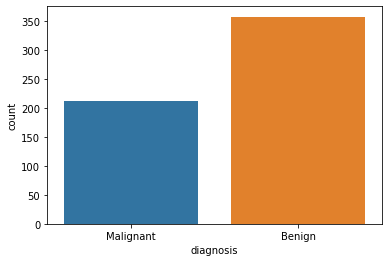

In [10]:
# Plotting "Malignant" and "Benign" distribution graphically
sns.countplot(diagnosis);

In [11]:
Cancer_dataset = Cancer_dataset.replace(to_replace = ['Malignant','Benign'],value = [1,0])
Cancer_dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
# Look for zero values
zeroes = (Cancer_dataset[["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
                 "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean", 
                  "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", 
                  "concave points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst", 
                  "area_worst","smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst",
                 "symmetry_worst", "fractal_dimension_worst"]] == 0).sum()
print(zeroes)

radius_mean                 0
texture_mean                0
perimeter_mean              0
area_mean                   0
smoothness_mean             0
compactness_mean            0
concavity_mean             13
concave points_mean        13
symmetry_mean               0
fractal_dimension_mean      0
radius_se                   0
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               0
compactness_se              0
concavity_se               13
concave points_se          13
symmetry_se                 0
fractal_dimension_se        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst            13
concave points_worst       13
symmetry_worst              0
fractal_dimension_worst     0
dtype: int64


In [13]:
# Removing the entries with zeroes
indexes = [101, 140, 174, 175, 192, 314, 391, 473, 538, 550, 557, 561, 568]
Cancer_dataset = Cancer_dataset.drop(indexes, axis = 0)
Cancer_dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,1,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820


Visualization and Correlation matrix to understand the relationship between different attributes

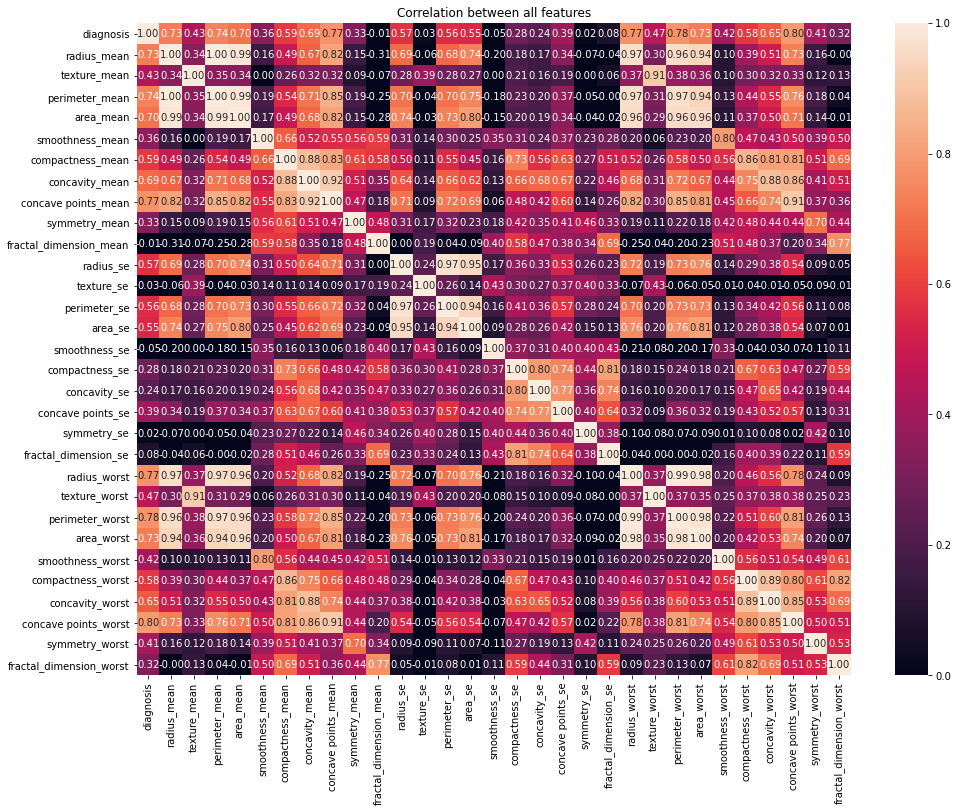

In [14]:
plt.figure(figsize=(16, 12))
sns.heatmap(Cancer_dataset.corr(), annot=True, fmt='.2f', vmin=0);
plt.title('Correlation between all features');

Dark pink is where there is high correlation between the features, but for this effort
we are mainly interested in univariate and multivariate correlation w.r.t breast cancer 
for the prediction models. 

There are number of features with the corr > 0.50 which will be relevant for the ML models. These features are listed below

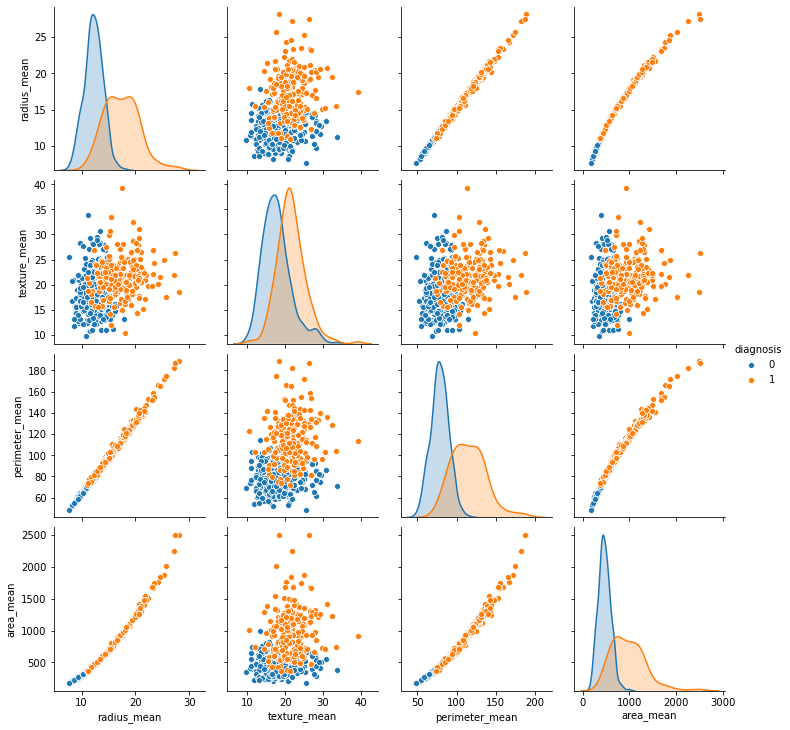

In [15]:
sns.pairplot(Cancer_dataset.loc[:,'diagnosis':'area_mean'], hue="diagnosis");

In the above pair plot, blue refers to "Benign" and orange to "Malignant" and can see
clear clustering seperating the data points.

In [16]:
corr = Cancer_dataset.corr()

In [17]:
corr[abs(corr['diagnosis']) > 0.50].index

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_se', 'perimeter_se', 'area_se', 'radius_worst',
       'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')

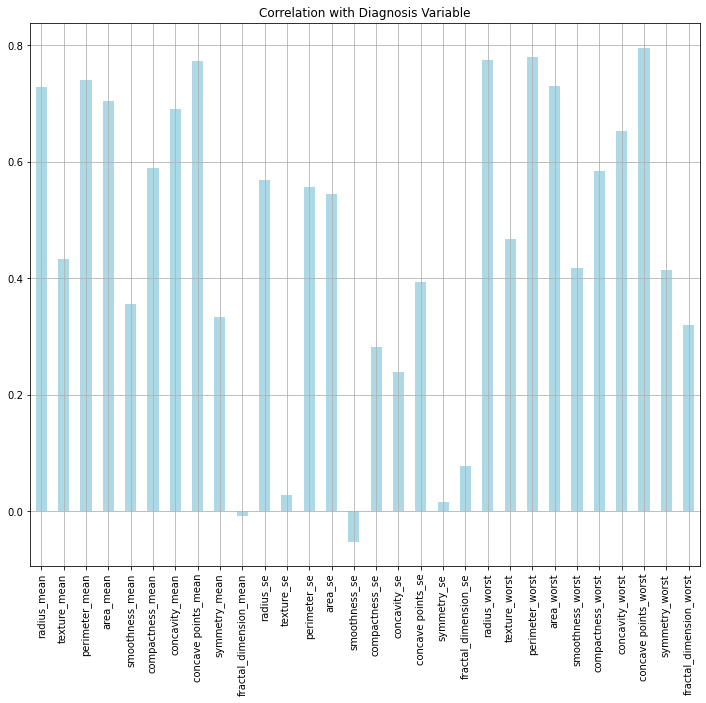

In [18]:
Cancer_dataset.drop('diagnosis', axis=1).corrwith(Cancer_dataset.diagnosis).plot(kind='bar', 
grid=True, figsize=(12, 10), title="Correlation with Diagnosis Variable",color="lightblue");

In [19]:
ML_dataset = Cancer_dataset[['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_se', 'perimeter_se', 'area_se', 'radius_worst',
       'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst']]

Split the target variables and the predicting variables

In [20]:
X = ML_dataset.drop(['diagnosis'],axis = 1)
y = ML_dataset['diagnosis']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
print("Size of training set:", X_train.shape)
print("Size of training set:", X_test.shape)

Size of training set: (389, 15)
Size of training set: (167, 15)


In [40]:
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
# data preprocessing libs
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# sklearn classifiers to import
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# model building, predict, accuracy imports
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from IPython.display import display
from sklearn.metrics import f1_score
from sklearn import metrics


In [23]:
def random_forest(X_train, y_train):
    # Create a Random Forest Classifier
    rf = RandomForestClassifier()
    # Hyperparameter Optimization
    parameters = {'n_estimators': [4, 6, 9, 10, 15], 
                  'max_features': ['log2', 'sqrt','auto'], 
                  'criterion': ['entropy', 'gini'],
                  'max_depth': [2, 3, 5, 10], 
                  'min_samples_split': [2, 3, 5],
                  'min_samples_leaf': [1, 5, 8]
                 }
    # Run the grid search
    grid_obj = GridSearchCV(rf, parameters)
    grid_obj = grid_obj.fit(X_train, y_train)
    # Set the rf to the best combination of parameters
    rf = grid_obj.best_estimator_
    # Train the model using the training sets 
    rf.fit(X_train,y_train)
    # Use the above trained model for the prediction
    y_pred = rf.predict(X_test)
    return y_pred

In [24]:
y_pred = random_forest(X_train, y_train)

In [25]:
# Calculating the accuracy
def accuracy(y_test, y_pred):
    acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
    return acc_rf

In [26]:
# Random forest accuracy
acc_rf = accuracy(y_test, y_pred)
print( 'Accuracy of random forest model : ', acc_rf )

Accuracy of random forest model :  93.41


Performance comparison of other ML models

In [41]:
# Build parameters of all classifiers, these are taken from Online as to
# What are most important parameters to change for each of the models
decision_tree_params = dict(criterion=['gini', 'entropy'], splitter=['best', 'random'], min_samples_split=[2, 3, 4],
                            max_features=[2,3,'auto', 'log2', 'sqrt', None], class_weight=['balanced', None], presort=[False, True])

perceptron_params = dict(penalty=[None, 'l2', 'l1', 'elasticnet'], fit_intercept=[False, True], shuffle=[False, True],
                         class_weight=['balanced', None], alpha=[0.0001, 0.00025], max_iter=[30,50,90])

svm_params = dict(shrinking=[False, True], degree=[3,4], class_weight=['balanced', None])

log_reg_params = dict(class_weight=['balanced', None], solver=['newton-cg', 'lbfgs', 'liblinear', 'sag'], fit_intercept=[True, False])

knn_params = dict(n_neighbors=[2, 3, 5, 10], weights=['uniform', 'distance'],
                  algorithm=['auto', 'ball_tree', 'kd_tree', 'brute'], leaf_size=[5,10,15,20])

bagging_params = dict(n_estimators=[5, 12, 15, 20], bootstrap=[False, True])

ada_boost_params = dict(n_estimators=[50, 75, 100], algorithm=['SAMME', 'SAMME.R'])

guassiannb_params = dict()

gradient_boosting_params = dict(n_estimators=[15, 25, 50])

In [42]:
params = [ decision_tree_params, perceptron_params, svm_params, log_reg_params, knn_params,
    bagging_params, ada_boost_params, guassiannb_params, gradient_boosting_params]
# classifiers to test
classifiers = [ DecisionTreeClassifier(), Perceptron(), SVC(), LogisticRegression(),
    KNeighborsClassifier(), BaggingClassifier(), AdaBoostClassifier(),
    GaussianNB(), GradientBoostingClassifier()]

names = ['DecisionTree', 'Perceptron', 'SVM',
    'LogisticRegression', 'KNearestNeighbors', 'Bagging', 
    'AdaBoost', 'Naive-Bayes', 'GradientBoosting']

models = dict(zip(names, zip(classifiers, params)))
num_folds = 15


In [48]:
#Finding best parameters using Gridsearch 
def parameter_tuning(models, X_train, X_test, y_train, y_test):
    print(num_folds,'fold cross-validation is used')
    print()
    accuracies = []
    # dataframe to store intermediate results
    f1_scores = 0
    dataframes = []
    best_parameters = []
    for name, clf_and_params in models.items():
        print('Computing GridSearch on {} '.format(name))
        clf, clf_params = clf_and_params
        grid_clf = GridSearchCV(estimator=clf, param_grid=clf_params, cv=num_folds)
        grid_clf = grid_clf.fit(X_train, y_train)
        dataframes.append((name, grid_clf.cv_results_))
        best_parameters.append((name, grid_clf.best_params_))
        predictions = grid_clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        f1_scores = f1_score(y_test, predictions, average='micro')
        cv_scores = cross_val_score(clf, X_train, y_train, cv=num_folds)
        accuracies.append((name, accuracy, np.mean(cv_scores), f1_scores))
    return accuracies, dataframes, best_parameters

In [49]:
results, dataframes, best_parameters = parameter_tuning(models, X_train, X_test, y_train, y_test)

15 fold cross-validation is used

Computing GridSearch on DecisionTree 


/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated an

Computing GridSearch on Perceptron 


/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning:

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning:

Computing GridSearch on SVM 
Computing GridSearch on LogisticRegression 


/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logisti

/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/local/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:

Computing GridSearch on KNearestNeighbors 
Computing GridSearch on Bagging 
Computing GridSearch on AdaBoost 
Computing GridSearch on Naive-Bayes 
Computing GridSearch on GradientBoosting 


In [56]:
for name, bp in best_parameters:
    print('============================================================')
    print('{} classifier GridSearch Best Parameters'.format(name))
    display(bp)
print()
print('============================================================')
for classifier, acc, cv_acc, f1_score in results:
    print('{}: Accuracy with Best Parameters = {:.2f}% || Mean Cross Validation Accuracy = {:.2f}% || F1_Score = {:.2f}'.format(classifier, round(acc*100,4), round(cv_acc*100,4), f1_score))
print()

DecisionTree classifier GridSearch Best Parameters


{'class_weight': None,
 'criterion': 'gini',
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'presort': True,
 'splitter': 'best'}

Perceptron classifier GridSearch Best Parameters


{'alpha': 0.0001,
 'class_weight': None,
 'fit_intercept': True,
 'max_iter': 30,
 'penalty': None,
 'shuffle': False}

SVM classifier GridSearch Best Parameters


{'class_weight': None, 'degree': 3, 'shrinking': False}

LogisticRegression classifier GridSearch Best Parameters


{'class_weight': 'balanced', 'fit_intercept': True, 'solver': 'newton-cg'}

KNearestNeighbors classifier GridSearch Best Parameters


{'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 5, 'weights': 'uniform'}

Bagging classifier GridSearch Best Parameters


{'bootstrap': True, 'n_estimators': 12}

AdaBoost classifier GridSearch Best Parameters


{'algorithm': 'SAMME.R', 'n_estimators': 50}

Naive-Bayes classifier GridSearch Best Parameters


{}

GradientBoosting classifier GridSearch Best Parameters


{'n_estimators': 15}


DecisionTree: Accuracy with Best Parameters = 94.61% || Mean Cross Validation Accuracy = 91.01% || F1_Score = 0.95
Perceptron: Accuracy with Best Parameters = 91.62% || Mean Cross Validation Accuracy = 80.16% || F1_Score = 0.92
SVM: Accuracy with Best Parameters = 92.22% || Mean Cross Validation Accuracy = 90.75% || F1_Score = 0.92
LogisticRegression: Accuracy with Best Parameters = 94.61% || Mean Cross Validation Accuracy = 93.32% || F1_Score = 0.95
KNearestNeighbors: Accuracy with Best Parameters = 92.22% || Mean Cross Validation Accuracy = 92.03% || F1_Score = 0.92
Bagging: Accuracy with Best Parameters = 94.01% || Mean Cross Validation Accuracy = 93.07% || F1_Score = 0.94
AdaBoost: Accuracy with Best Parameters = 94.01% || Mean Cross Validation Accuracy = 93.32% || F1_Score = 0.94
Naive-Bayes: Accuracy with Best Parameters = 93.41% || Mean Cross Validation Accuracy = 92.81% || F1_Score = 0.93
GradientBoosting: Accuracy with Best Parameters = 94.61% || Mean Cross Validation Accurac

Here are the final prediction results from various ML models:
    
DecisionTree: Accuracy with Best Parameters = 94.61% || Mean Cross Validation Accuracy = 91.01% || F1_Score = 0.95
Perceptron: Accuracy with Best Parameters = 91.62% || Mean Cross Validation Accuracy = 80.16% || F1_Score = 0.92
SVM: Accuracy with Best Parameters = 92.22% || Mean Cross Validation Accuracy = 90.75% || F1_Score = 0.92
LogisticRegression: Accuracy with Best Parameters = 94.61% || Mean Cross Validation Accuracy = 93.32% || F1_Score = 0.95
KNearestNeighbors: Accuracy with Best Parameters = 92.22% || Mean Cross Validation Accuracy = 92.03% || F1_Score = 0.92
Bagging: Accuracy with Best Parameters = 94.01% || Mean Cross Validation Accuracy = 93.07% || F1_Score = 0.94
AdaBoost: Accuracy with Best Parameters = 94.01% || Mean Cross Validation Accuracy = 93.32% || F1_Score = 0.94
Naive-Bayes: Accuracy with Best Parameters = 93.41% || Mean Cross Validation Accuracy = 92.81% || F1_Score = 0.93
GradientBoosting: Accuracy with Best Parameters = 94.61% || Mean Cross Validation Accuracy = 94.36% || F1_Score = 0.95

Gradient boosting gives the best overall accuracy and F1 score for this problem.
Thing to note is this analysis is done at a high level and there are several more
sophesticated data preprocessing methods that can be used to improve the score and 
select even better features. 